In [ ]:
# Here we are using a multi-feature linear regression model to predict 2024 AQI using the 2023 figures. To evaluate
# performance, we will run a baseline where our 2023 AQI is our 2024 AQI. The analysis will be done
# by state.

In [13]:
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [16]:
df_2023 = pd.read_csv("Data/24StateAQI_2023.csv")
df_2024 = pd.read_csv("Data/24StateAQI_2024.csv")

In [17]:
df_2023_bystate = df_2023.groupby("State Name", as_index=False)["AQI"].mean().rename(columns={"AQI": "AQI_2023"})
df_2024_bystate = df_2024.groupby("State Name", as_index=False)["AQI"].mean().rename(columns={"AQI": "AQI_2024"})
# aggregate by state name, get average aqi per state, we also rename some columns to avoid duplicate column names.


In [18]:
df = pd.merge(df_2023_bystate, df_2024_bystate, on="State Name")

X = df[['AQI_2023']].values
y = df['AQI_2024'].values 

In [19]:
y_baseline = df['AQI_2023'].values
baseline_mse = mean_squared_error(y, y_baseline)
baseline_r2 = r2_score(y, y_baseline)
print("Baseline:")
print("Mean Squared Error:", baseline_mse)
print("R2 Score:", baseline_r2)
print(f"RMSE: {math.sqrt(baseline_mse)} AQI units")

Baseline:
Mean Squared Error: 66.29198501264854
R2 Score: 0.18764956246245157
RMSE: 8.141989008384163 AQI units


In [20]:
model = LinearRegression()
model.fit(X,y)
pred = model.predict(X)
#simple linear regression

In [21]:
lr_mse = mean_squared_error(y, pred)
lr_r2 = r2_score(y, pred)

print("Linear Regression Model:")
print("Mean Squared Error:", lr_mse)
print("R2 Score:", lr_r2)
print(f"RMSE: {math.sqrt(lr_mse)} AQI units")

Linear Regression Model:
Mean Squared Error: 30.24885623589958
R2 Score: 0.629326658516034
RMSE: 5.499896020462531 AQI units


In [14]:
# Although this is just a starting point, we can see that we can more accurately predict AQI through machine
# learning as opposed to relying solely on historical data. Going forward, we will implement a more complex model
# that predicts AQI using all of the features from the dataset and can draw more complex conclusions about AQI
# and the factors that go into it. 

In [33]:
# Drop non-numeric columns except "State Name"
numeric_cols = df_2023.select_dtypes(include='number').columns
numeric_cols = df_2023.select_dtypes(include='number').columns.drop("AQI")
df_2023_bystate_full = df_2023.groupby("State Name")[numeric_cols].mean().reset_index()

# Merge with 2024 AQI data
df_full = pd.merge(df_2023_bystate_full, df_2024_bystate, on="State Name")

In [34]:
# Features and target and training Random Forest Model
X = df_full.drop(columns=["State Name", "AQI_2024"])
y = df_full["AQI_2024"]

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)
pred = rf_model.predict(X)

In [35]:
# Evaluate
rf_mse = mean_squared_error(y, pred)
rf_r2 = r2_score(y, pred)
print("\nRandom Forest Model:")
print("Mean Squared Error:", rf_mse)
print("R2 Score:", rf_r2)
print(f"RMSE: {math.sqrt(rf_mse)} AQI units")


Random Forest Model:
Mean Squared Error: 6.0916684035727355
R2 Score: 0.9253519186062722
RMSE: 2.468130548324528 AQI units


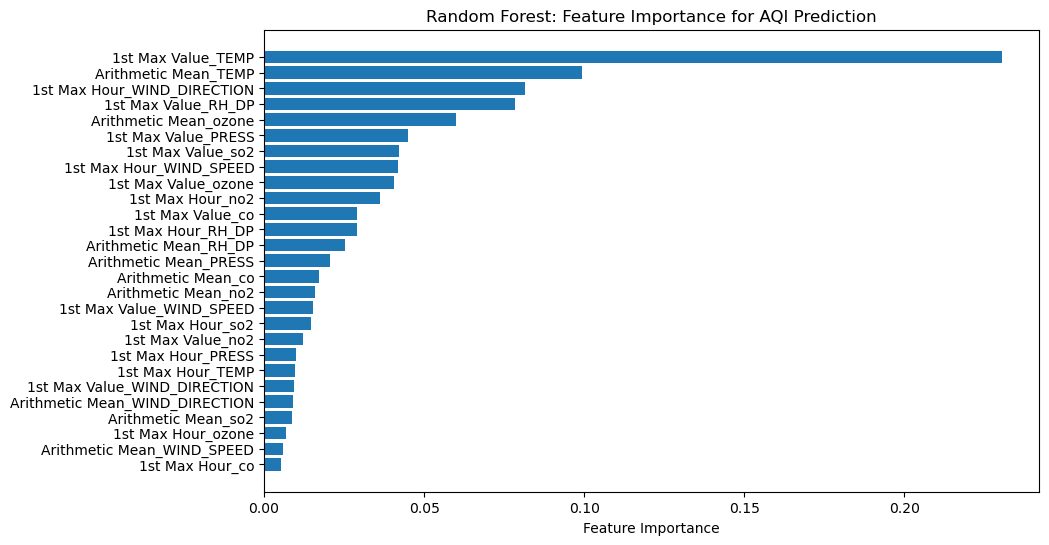

In [36]:
# Feature importance
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest: Feature Importance for AQI Prediction")
plt.gca().invert_yaxis()
plt.show()

In [37]:
#This feature importance plot shows that temperature, wind and humidity are the most influential drivers of AQI changes year over year.
#Traditional pollutant measurements (CO, NO2, SO2) play a secondary role showing the strong impact of meteo